In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [2]:
blobs = pd.read_csv('../DATA/cluster_blobs.csv')

In [3]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

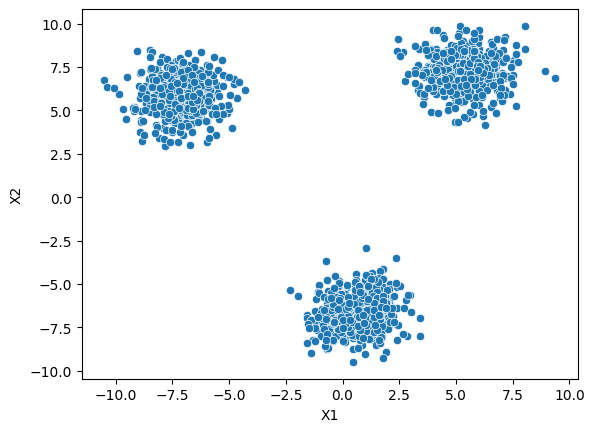

In [5]:
sns.scatterplot(data=blobs, x='X1', y='X2')

In [6]:
moons = pd.read_csv('../DATA/cluster_moons.csv')

<Axes: xlabel='X1', ylabel='X2'>

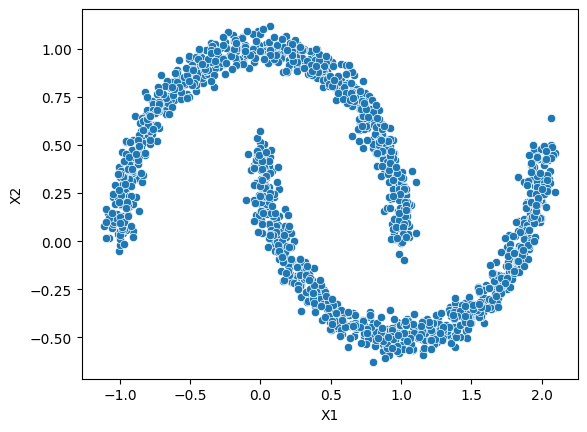

In [7]:
sns.scatterplot(data=moons, x='X1', y='X2')

In [12]:
circles = pd.read_csv('../DATA/cluster_circles.csv')

<Axes: xlabel='X1', ylabel='X2'>

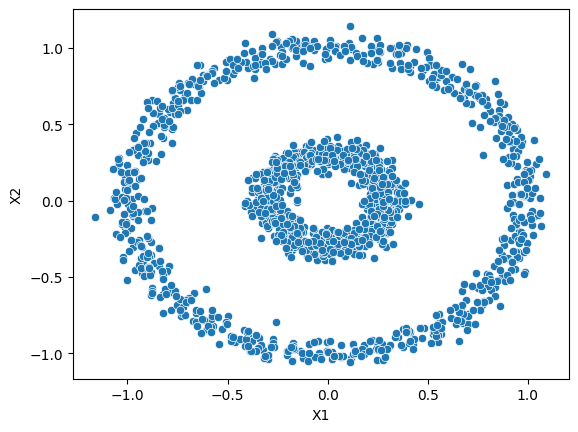

In [13]:
sns.scatterplot(data=circles, x='X1', y='X2')

In [15]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [17]:
kmeans = KMeans(n_clusters=3)

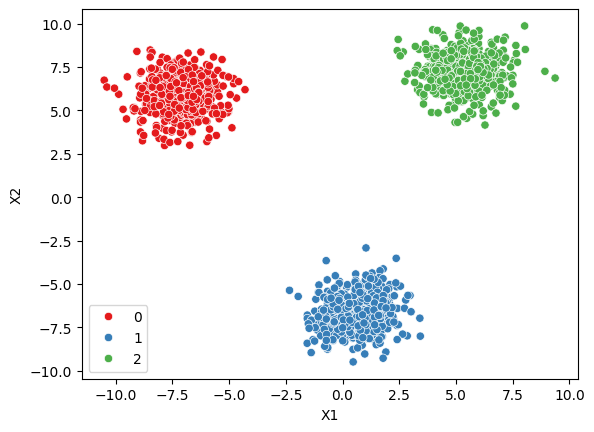

In [18]:
display_categories(kmeans, blobs)

In [19]:
kmeans = KMeans(n_clusters=2)

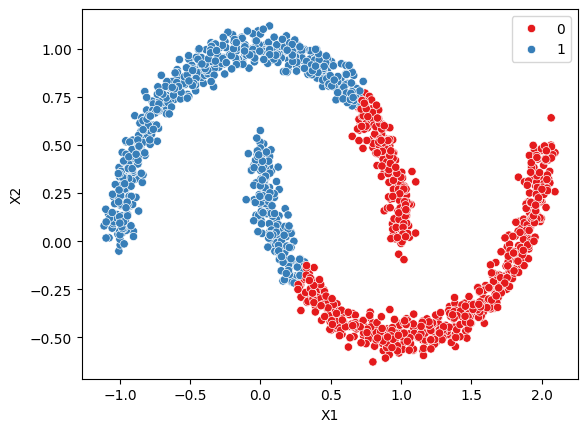

In [20]:
display_categories(kmeans, moons)

In [21]:
kmeans = KMeans(n_clusters=2)

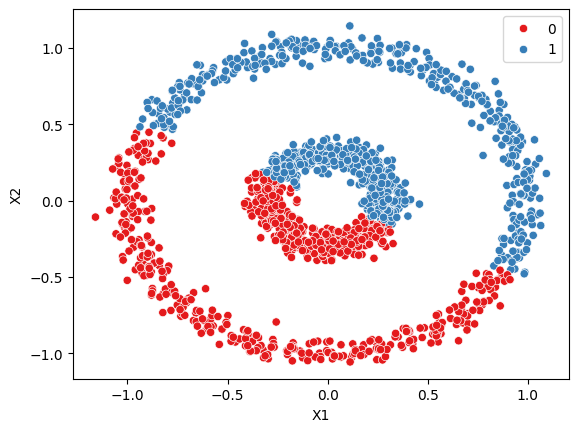

In [22]:
display_categories(kmeans, circles)

In [24]:
dbscan = DBSCAN()

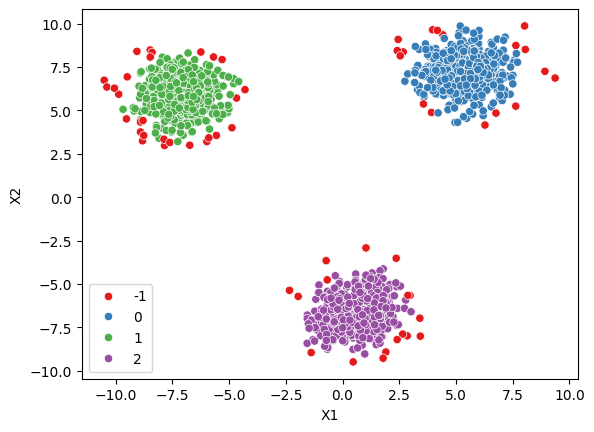

In [25]:
display_categories(dbscan, blobs)

In [27]:
dbscan = DBSCAN(eps=0.15)

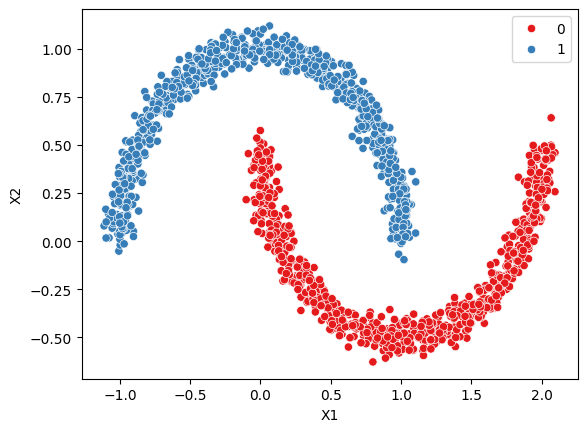

In [28]:
display_categories(dbscan, moons)

In [29]:
dbscan = DBSCAN(eps=0.15)

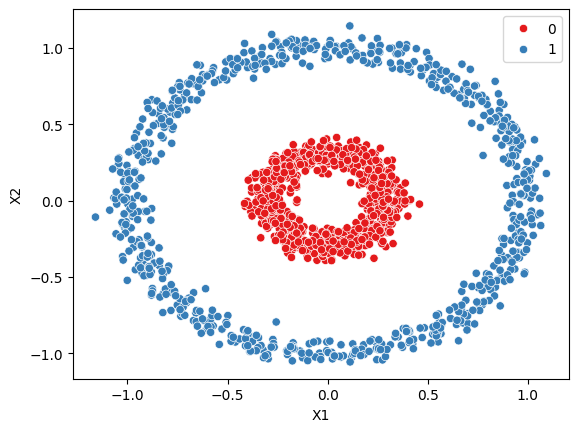

In [30]:
display_categories(dbscan, circels)

In [2]:
two_blobs = pd.read_csv('../DATA/cluster_two_blobs.csv')

In [3]:
two_blobs_outliers = pd.read_csv('../DATA/cluster_two_blobs_outliers.csv')

<Axes: xlabel='X1', ylabel='X2'>

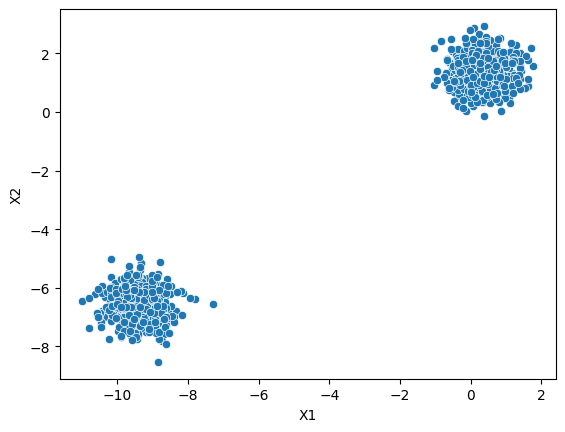

In [4]:
sns.scatterplot(data=two_blobs, x='X1', y='X2')

<Axes: xlabel='X1', ylabel='X2'>

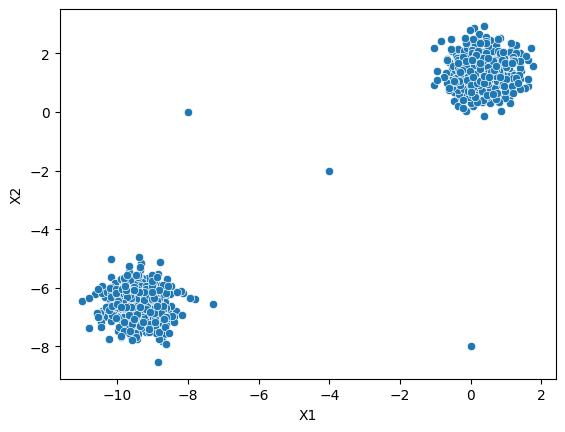

In [5]:
sns.scatterplot(data=two_blobs_outliers, x='X1', y='X2')

In [6]:
def display_categories(model, data):
    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x='X1', y='X2', hue=labels, palette='Set1')

In [7]:
model = DBSCAN()

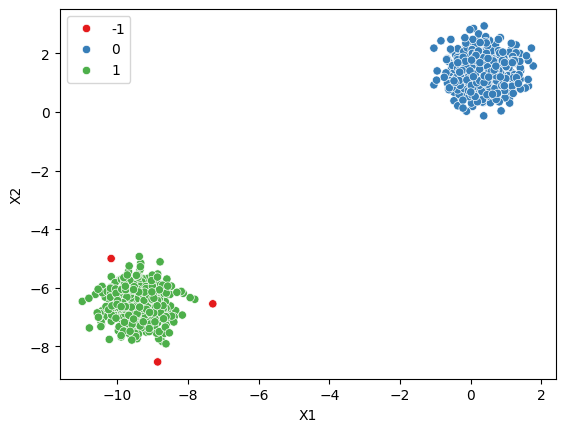

In [8]:
display_categories(model, two_blobs)

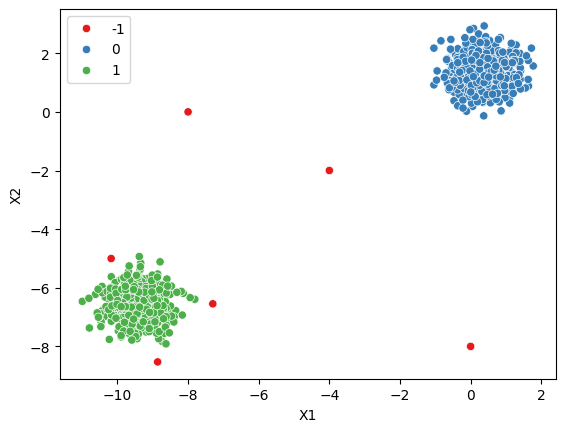

In [9]:
display_categories(model, two_blobs_outliers)

In [10]:
#Изменим парамаетр eps
model = DBSCAN(eps=0.001)

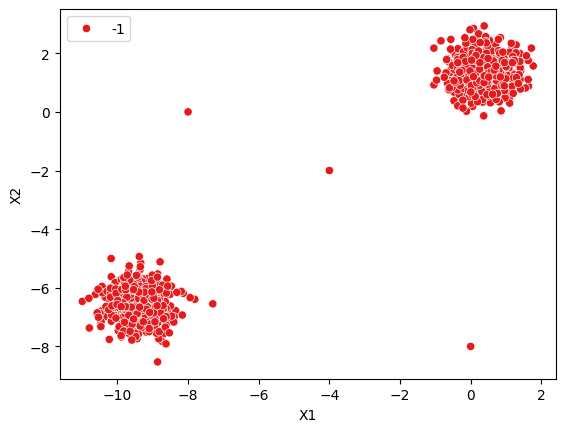

In [12]:
display_categories(model, two_blobs_outliers) #Все точки являются выбросами

In [13]:
model = DBSCAN(eps=100)

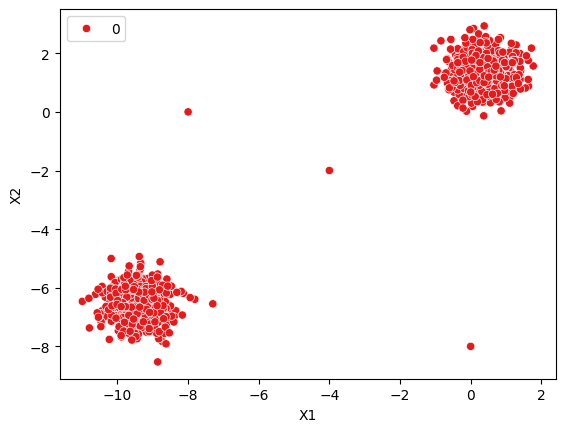

In [15]:
display_categories(model, two_blobs_outliers) #Все точки относятся к одному кластеру

In [16]:
model = DBSCAN(eps=1)

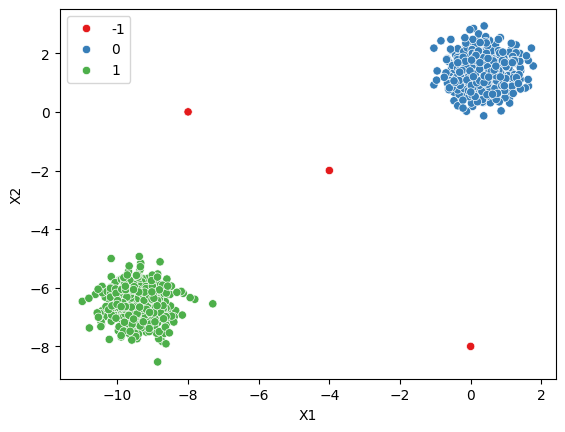

In [17]:
display_categories(model, two_blobs_outliers)

In [38]:
eps_outliers = []
for epsilon in np.linspace(0.001, 2, 100):
    model = DBSCAN(eps=epsilon)
    labels = model.fit_predict(two_blobs_outliers)
    eps_outliers.append(np.sum(labels == -1) / len(labels))

(0.0, 0.5)

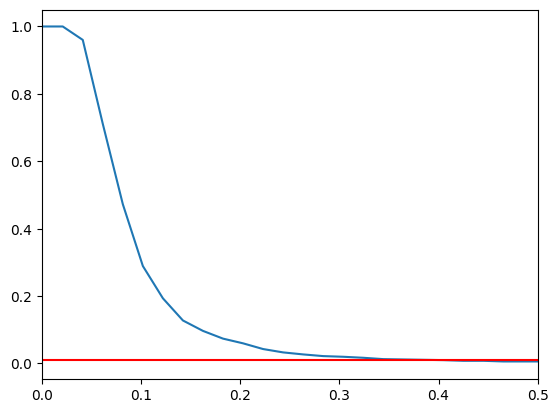

In [48]:
sns.lineplot(x=np.linspace(0.001, 2, 100), y=eps_outliers)
plt.hlines(y=0.01, xmin=0, xmax=2, colors='red')
plt.xlim(0, 0.5)

In [60]:
model = DBSCAN(eps=1, min_samples=1)

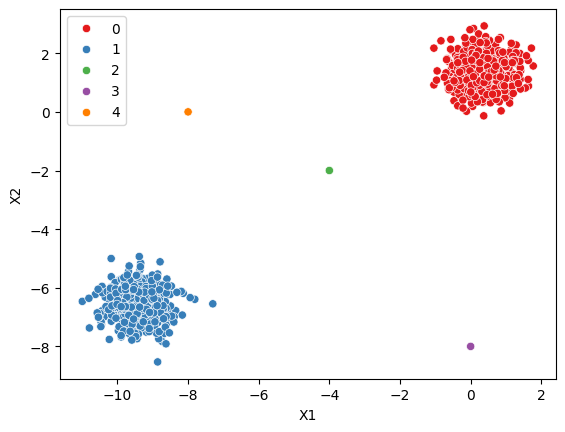

In [61]:
display_categories(model, two_blobs_outliers) #При мин. значении 1 мы получим 3 точки в отдельных кластерах